# Homework 00

In [5]:
import numpy as np
import pandas as pd

In [15]:
# Initialize gunshot deaths dataframe
RAW_DATA = '../data/interactive_data.csv'
df = pd.read_csv(RAW_DATA, index_col=0)

# Set NaNs in place of 'None selected' values
df = df.replace('None selected', np.NaN)

# Example view
df

,Intent,Gender,Age,Race,Deaths,Population,Rate
1,NaN,NaN,NaN,NaN,33599,316299978,10.6
2,NaN,NaN,NaN,White,22079,197369634,11.2
3,NaN,NaN,NaN,Black,7765,38896382,20.0
4,NaN,NaN,NaN,Hispanic,3007,54049078,5.6
5,NaN,NaN,NaN,Asian/Pacific Islander,442,16315561,2.7
...,...,...,...,...,...,...,...
536,Unknown,Male,5,White,0,0,NaN
537,Unknown,Male,5,Black,0,0,NaN
538,Unknown,Male,5,Hispanic,0,0,NaN
539,Unknown,Male,5,Asian/Pacific Islander,0,0,NaN


## Nearly *two-thirds* of gun deaths are *suicides* and around *a third* of all gun deaths are *homicides*

In [31]:
# Show deaths grouped by different intents
intents_overview_df = df.groupby(['Intent']).first()['Deaths']
intents_overview_df

Intent
Accident      546
Homicide    11726
Suicide     21058
Unknown       269
Name: Deaths, dtype: int64

<AxesSubplot:ylabel='Deaths'>

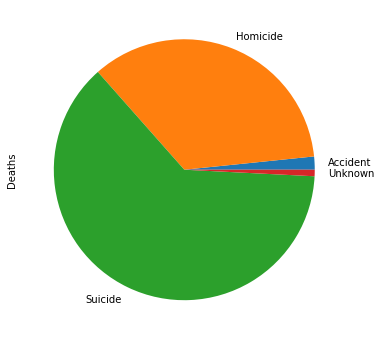

In [57]:
# Plot the same information as the previous block, but using a pie chart to highlight the two-thirds / one-third rates
intents_overview_df.plot.pie(figsize = (11, 6))

## More than *85 percent* of suicide victims are *male*

In [73]:
# Select all suicidal gunshot deaths
filt = (df['Intent'] == 'Suicide')
suicide_df = df.loc[filt]
# Group them by gender
gender_grp = suicide_df.groupby(['Gender']).first()
gender_grp['Deaths']

Gender
Female     2896
Male      18162
Name: Deaths, dtype: int64

In [96]:
# Calculate the percentage of male suicides
male_suicides = gender_grp.loc['Male', 'Deaths']
total_suicides = gender_grp.sum()['Deaths']
print(male_suicides / total_suicides * 100, '%')

86.24750688574414 %


## Around *two-thirds* of homicide victims who are *males* in the *age-group of 15 - 34* are *black*

In [84]:
# Create a filter for homicides of males in the age group of 15 - 34
filt = (df['Intent'] == 'Homicide') & (df['Gender'] == 'Male') & (df['Age'] == '15 - 34')
young_men_homicides_df = df.loc[filt]
young_men_homicides_df

,Intent,Gender,Age,Race,Deaths,Population,Rate
301,Homicide,Male,15 - 34,NaN,6520,44017869,14.8
302,Homicide,Male,15 - 34,White,913,24831032,3.7
303,Homicide,Male,15 - 34,Black,4312,5869943,73.5
304,Homicide,Male,15 - 34,Hispanic,1166,9379683,12.4
305,Homicide,Male,15 - 34,Asian/Pacific Islander,76,2415040,3.1
306,Homicide,Male,15 - 34,Other,54,1522171,3.5


<AxesSubplot:ylabel='Deaths'>

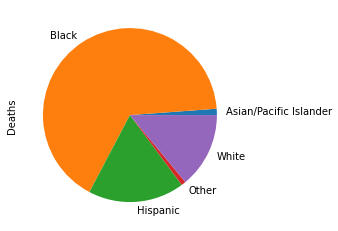

In [90]:
# Plot a pie chart to highlight the two-thrids ratio
young_men_homicides_df.groupby(['Race']).first()['Deaths'].plot.pie()